In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.io import loadmat
import pickle
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import norm

In [42]:
distribution2 = 'male_test_age_labels.npy'
ages2 = 'male_test_age.npy'
bins2 = 'bin_centers.npy'

distribution1 = '../../../../agemapper/datasets copy/male_test_age_labels.npy'
ages1 = '../../../../agemapper/datasets copy/male_test_age.npy'
bins1 = '../../../../agemapper/datasets copy/bin_centers.npy'

In [43]:
ages1 = np.load(ages1)
ages2 = np.load(ages2)
distribution1 = np.load(distribution1)
distribution2 = np.load(distribution2)
bins1 = np.load(bins1)
bins2 = np.load(bins2)

In [44]:
print(len(ages1))

5022


In [10]:
print(np.where(ages1 == ages1.min()))
print(np.where(ages2 == ages2.min()))

(array([2581]),)
(array([2581]),)


45.47408675799079


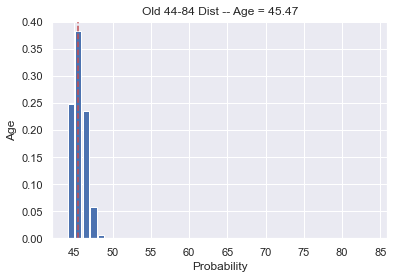

---
45.47408675799079


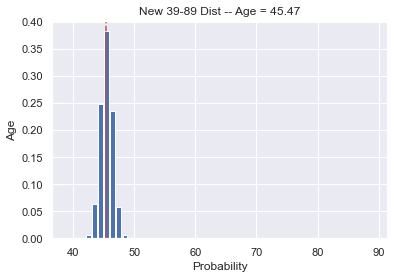

In [12]:
print(ages1[2581])
plt.bar(bins1, distribution1[2581])
plt.axvline(x=ages1[2581], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Age = {:.2f}'.format(ages1[2581]))
plt.ylabel('Age')
plt.xlabel('Probability')
plt.show()
print('---')
print(ages2[2581])
plt.bar(bins2, distribution2[2581])
plt.axvline(x=ages2[2581], ymin=0, ymax=1, c='r', ls='--')
plt.title('New 39-89 Dist -- Age = {:.2f}'.format(ages2[2581]))
plt.ylabel('Age')
plt.xlabel('Probability')
plt.show()

In [13]:
print((ages1==ages2).all())

True


In [45]:
arr1inds = ages1.argsort()
ages1 = ages1[arr1inds]
ages2 = ages2[arr1inds]
distribution1 = distribution1[arr1inds]
distribution2 = distribution2[arr1inds]

In [15]:
ages1[np.where(ages1<=46)]

array([45.47408676])

In [16]:
distribution1[:2]

array([[2.47489904e-01, 3.82806735e-01, 2.35958508e-01, 5.77458374e-02,
        5.55888616e-03, 2.08005836e-04, 2.99037360e-06, 1.63550101e-08,
        3.37679884e-11, 2.62012634e-14, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.31332210e-01, 3.37420245e-01, 3.45123504e-01, 1.40558728e-01,
        2.26454128e-02, 1.42764144e-03, 3.47967037e-05, 3.24322822e-07,
        1.14570853e-09, 1.52367008e-12, 7.77156117e-16, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [18]:
distribution1[np.where(ages1<=46)]

array([[2.47489904e-01, 3.82806735e-01, 2.35958508e-01, 5.77458374e-02,
        5.55888616e-03, 2.08005836e-04, 2.99037360e-06, 1.63550101e-08,
        3.37679884e-11, 2.62012634e-14, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# Things To Look At:
- Distributions of certain subjects at the edges
- Distributions of subjects in the area of the peak (several subjects, maybe overlayed)
- Average Distributions Across Bin Ranges (every 5 years?) 
- Distributions of Several Subjects in each bin


## Distributions of certain subjects at the edges

In [19]:
print("Min Age:", ages1.min())
print("Max Age:", ages1.max())

Min Age: 45.47408675799079
Max Age: 81.24897260273974


In [20]:
ages1[:5]

array([45.47408676, 46.02454338, 46.0793379 , 46.24394977, 46.28984018])

In [21]:
ages1[-5:]

array([80.41312785, 80.49646119, 80.66038813, 81.07477169, 81.2489726 ])

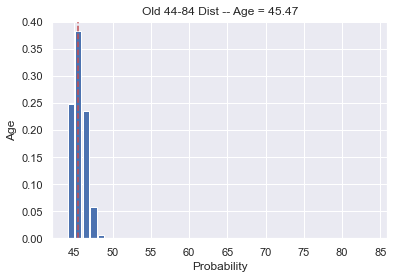

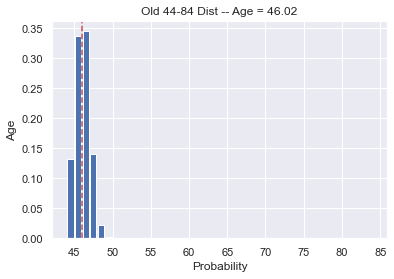

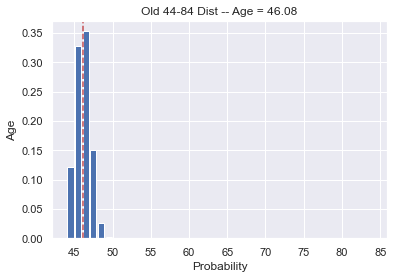

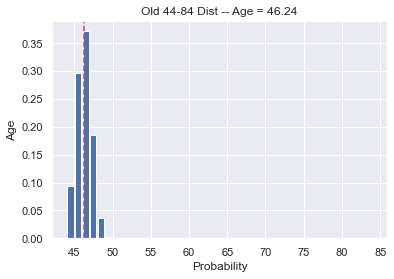

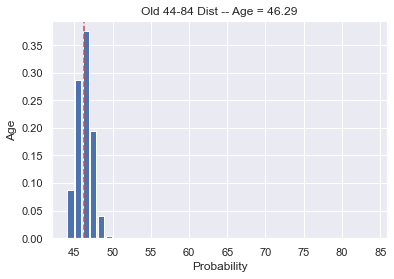

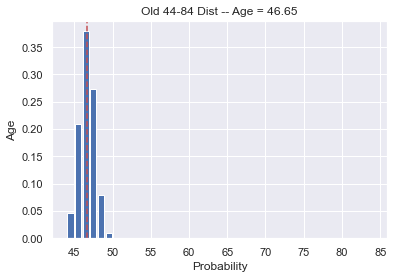

---


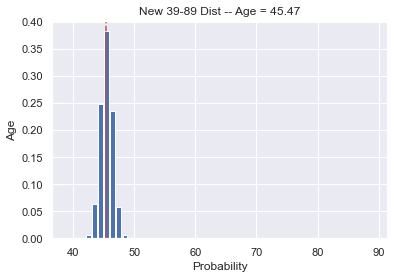

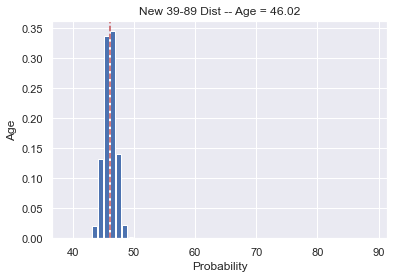

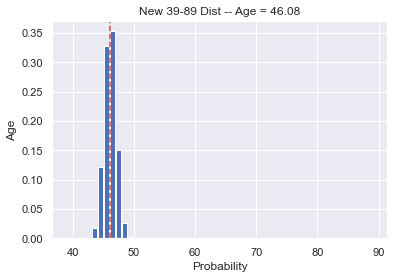

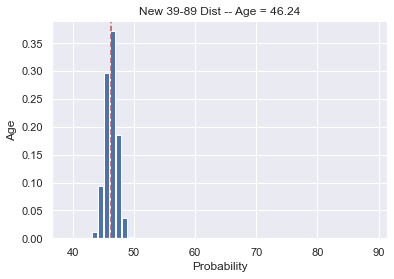

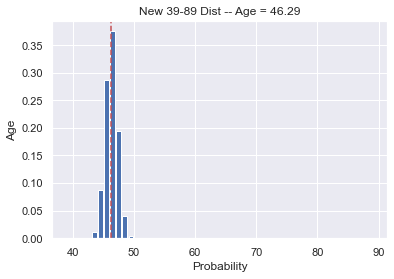

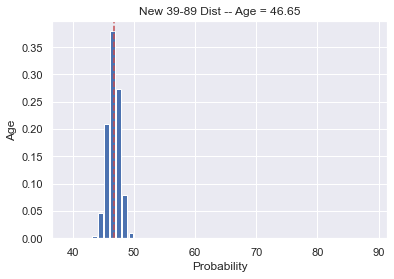

In [22]:
for i in [0,1,2,3,4,5]:
    plt.bar(bins1, distribution1[i])
    plt.axvline(x=ages1[i], ymin=0, ymax=1, c='r', ls='--')
    plt.title('Old 44-84 Dist -- Age = {:.2f}'.format(ages1[i]))
    plt.ylabel('Age')
    plt.xlabel('Probability')
    plt.show()
    
print('---')

for i in [0,1,2,3,4,5]:
    plt.bar(bins2, distribution2[i])
    plt.axvline(x=ages2[i], ymin=0, ymax=1, c='r', ls='--')
    plt.title('New 39-89 Dist -- Age = {:.2f}'.format(ages2[i]))
    plt.ylabel('Age')
    plt.xlabel('Probability')
    plt.show()

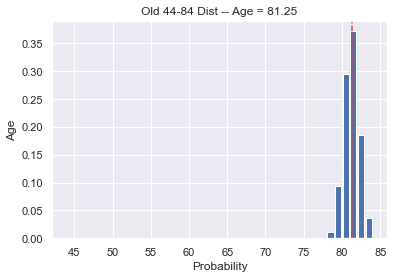

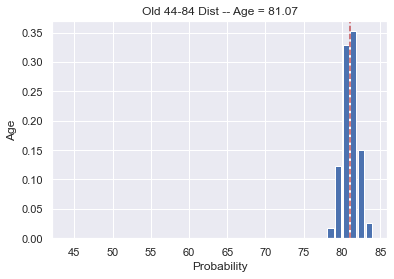

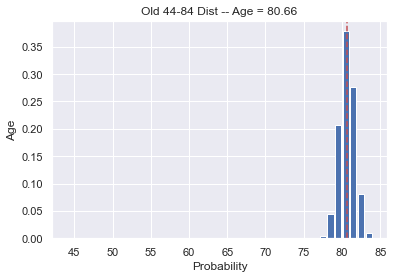

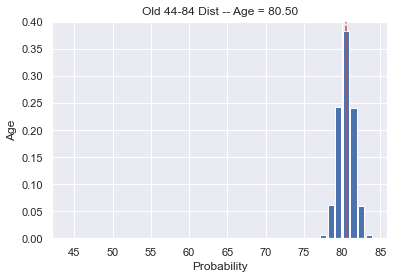

---


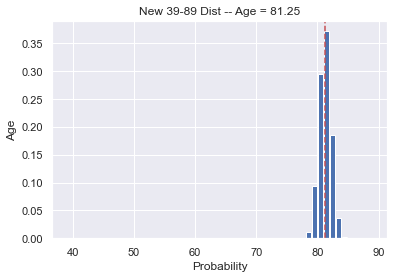

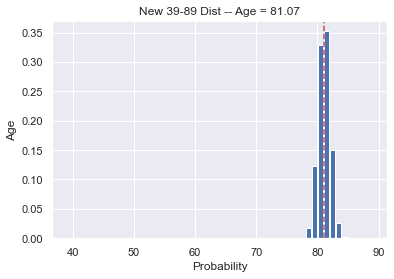

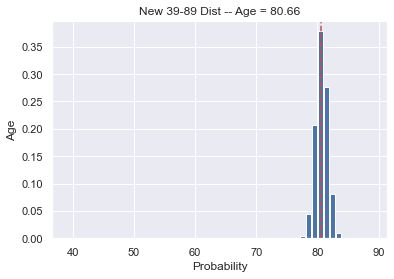

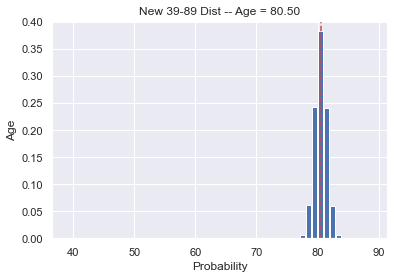

In [23]:
for i in [-1,-2,-3,-4]:
    plt.bar(bins1, distribution1[i])
    plt.axvline(x=ages1[i], ymin=0, ymax=1, c='r', ls='--')
    plt.title('Old 44-84 Dist -- Age = {:.2f}'.format(ages1[i]))
    plt.ylabel('Age')
    plt.xlabel('Probability')
    plt.show()
    
print('---')

for i in [-1,-2,-3,-4]:
    plt.bar(bins2, distribution2[i])
    plt.axvline(x=ages2[i], ymin=0, ymax=1, c='r', ls='--')
    plt.title('New 39-89 Dist -- Age = {:.2f}'.format(ages2[i]))
    plt.ylabel('Age')
    plt.xlabel('Probability')
    plt.show()

## Distributions of Several Subjects in each bin

In [24]:
age_bins = np.linspace(45,85,9)

In [25]:
print(len(age_bins[:-1]))

8


In [26]:
for idx, age in enumerate(age_bins[:-1]):
    age1 = ages1[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
    print(age1.min(), age1.max(), len(age1))
    age2 = ages2[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
    dist1 = distribution1[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
    dist2 = distribution2[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]

45.47408675799079 49.98436073059361 123
50.00751366120221 54.98938356164376 687
55.00901826484005 59.999316939890605 922
60.00102739726026 64.99988584474886 1114
65.03458904109584 69.99874429223746 1150
70.00696347031953 74.9877853881278 810
75.01381278538815 79.88344748858458 207
80.15856164383558 81.24897260273974 9


In [27]:
np.random.seed(42)

 ========= AGE RANGE: 45.0 - 50.0 ======== 


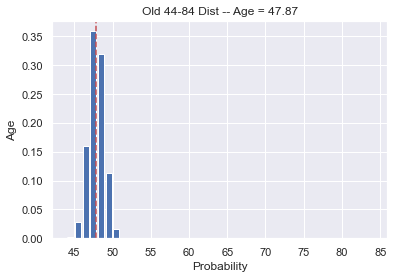

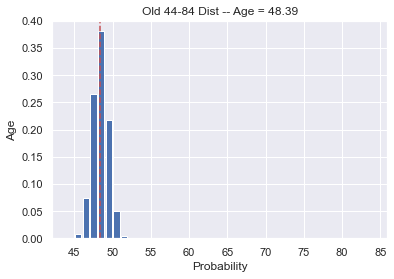

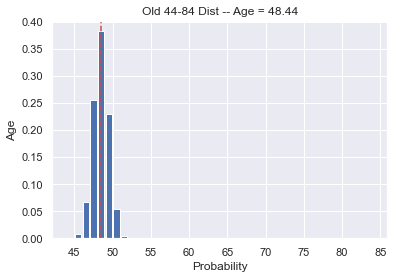

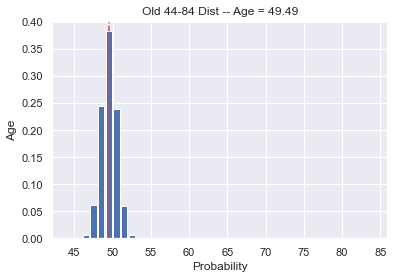

 ========= AGE RANGE: 50.0 - 55.0 ======== 


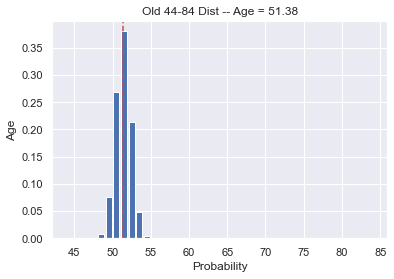

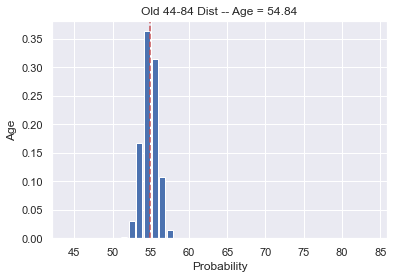

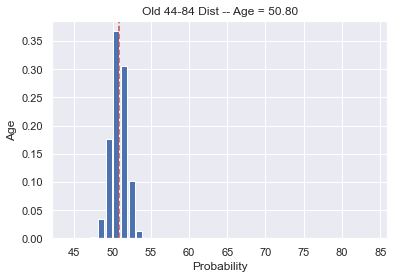

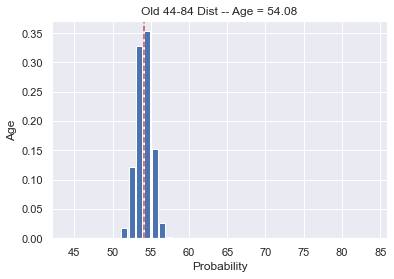

 ========= AGE RANGE: 55.0 - 60.0 ======== 


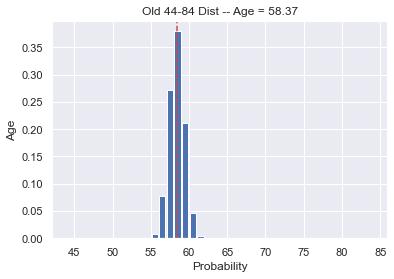

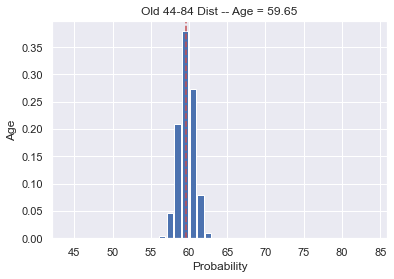

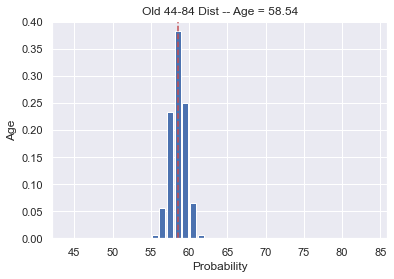

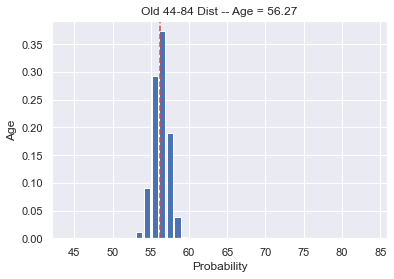

 ========= AGE RANGE: 60.0 - 65.0 ======== 


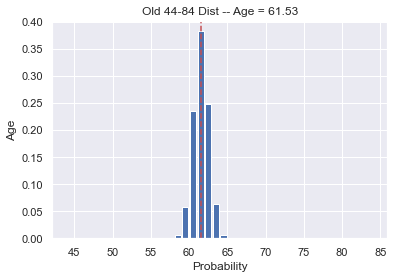

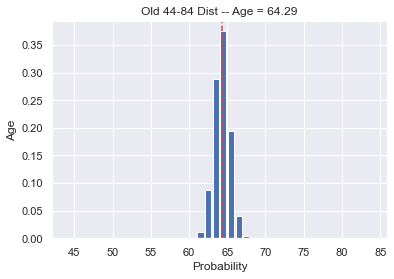

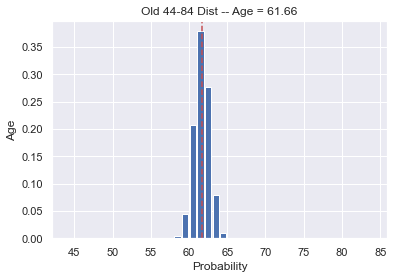

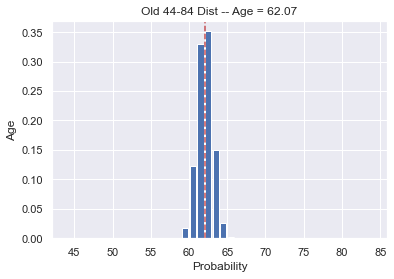

 ========= AGE RANGE: 65.0 - 70.0 ======== 


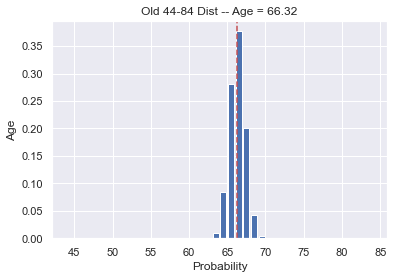

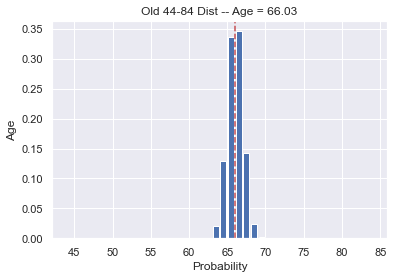

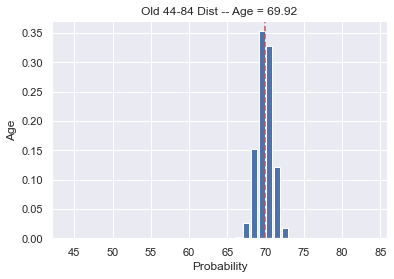

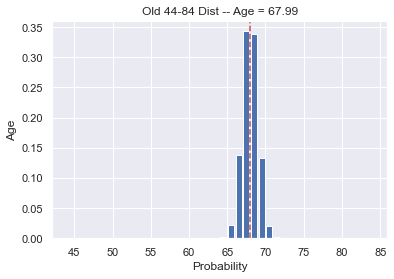

 ========= AGE RANGE: 70.0 - 75.0 ======== 


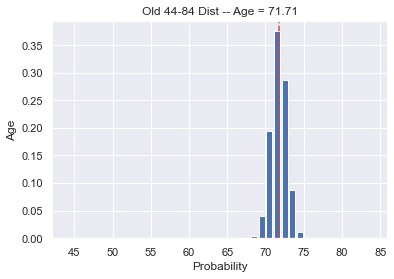

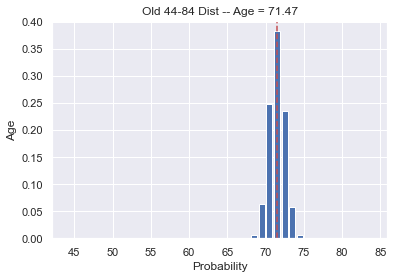

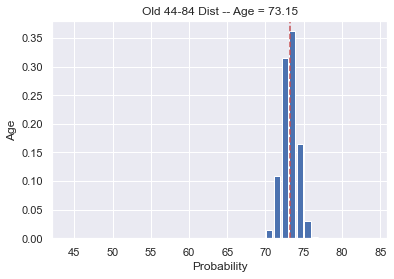

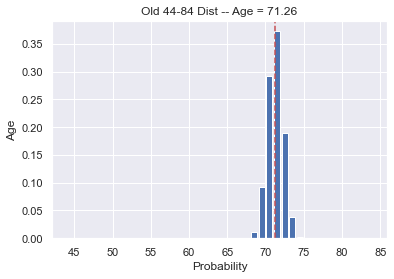

 ========= AGE RANGE: 75.0 - 80.0 ======== 


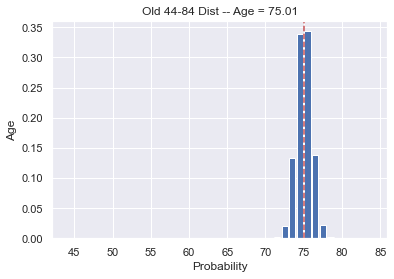

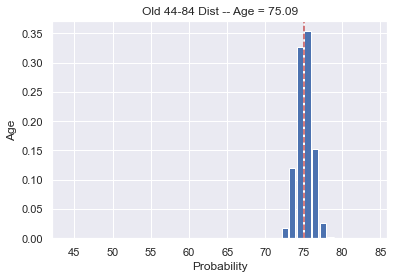

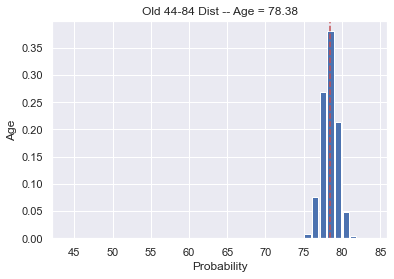

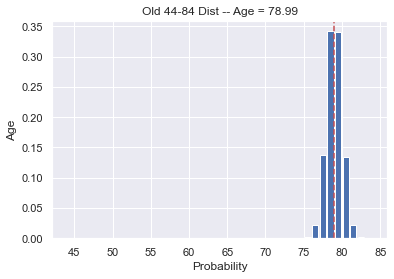

 ========= AGE RANGE: 80.0 - 85.0 ======== 


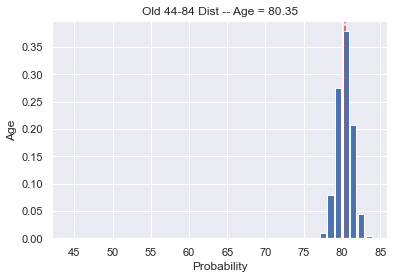

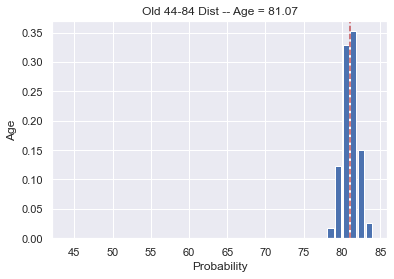

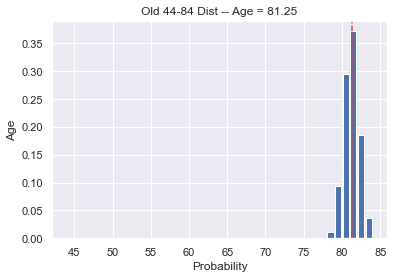

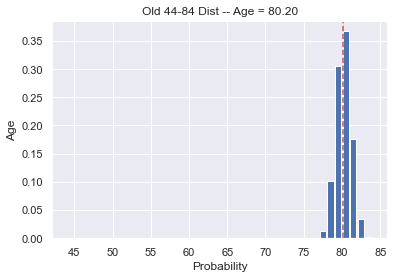

In [28]:
for idx, age in enumerate(age_bins[:-1]):
    age1 = ages1[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
    dist1 = distribution1[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
    
    print(" ========= AGE RANGE: {} - {} ======== ".format(age_bins[idx], age_bins[idx+1]))
    
    if len(age1) >= 4:
        random_subjects = np.random.choice(age1, size=4, replace=False)
    else:
        random_subjects = np.random.choice(age1, size=len(age1), replace=False)
    for subj in random_subjects:
        i = np.where(age1==subj)[0][0].astype(int)
        plt.bar(bins1, dist1[i])
        plt.axvline(x=age1[i], ymin=0, ymax=1, c='r', ls='--')
        plt.title('Old 44-84 Dist -- Age = {:.2f}'.format(age1[i]))
        plt.ylabel('Age')
        plt.xlabel('Probability')
        plt.show()

 ========= AGE RANGE: 45.0 - 50.0 ======== 


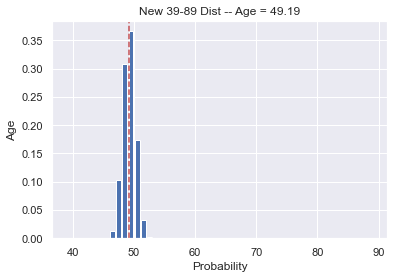

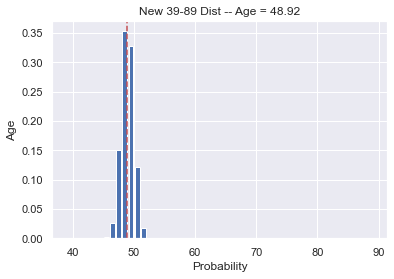

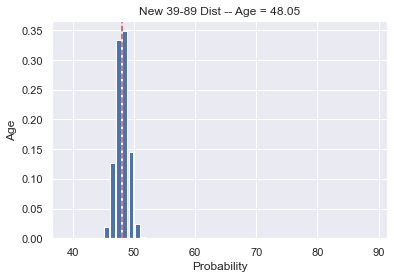

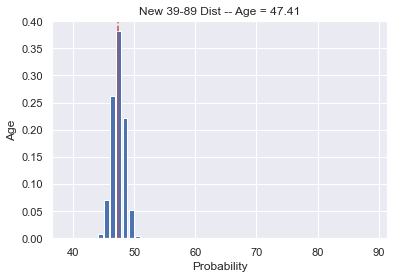

 ========= AGE RANGE: 50.0 - 55.0 ======== 


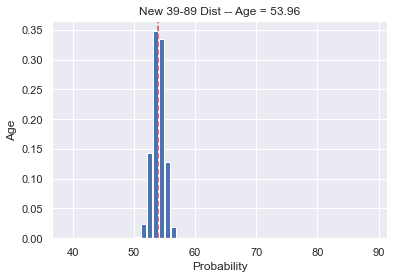

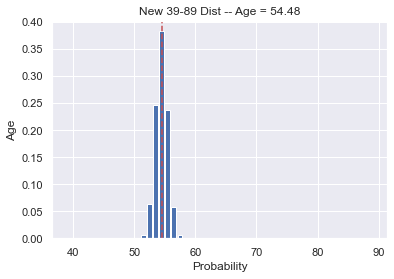

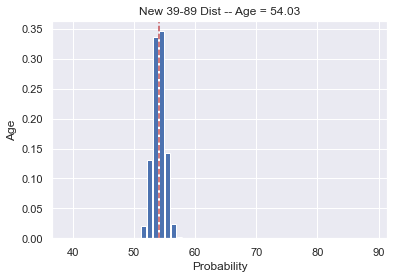

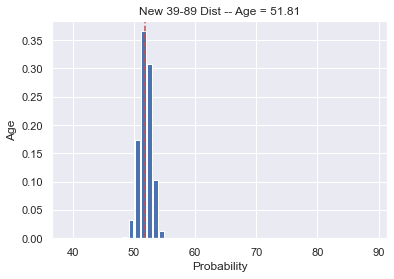

 ========= AGE RANGE: 55.0 - 60.0 ======== 


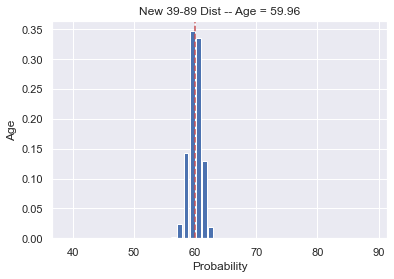

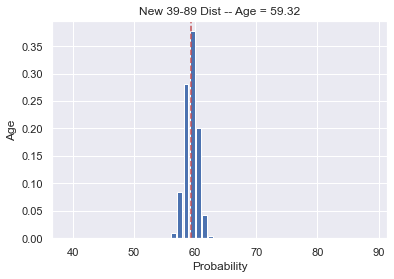

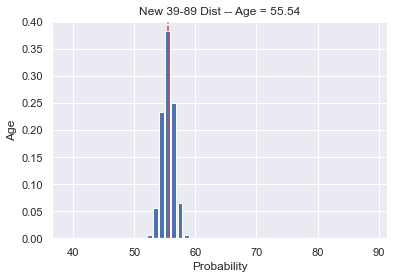

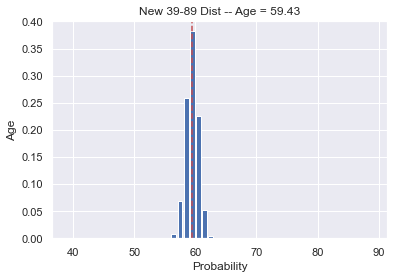

 ========= AGE RANGE: 60.0 - 65.0 ======== 


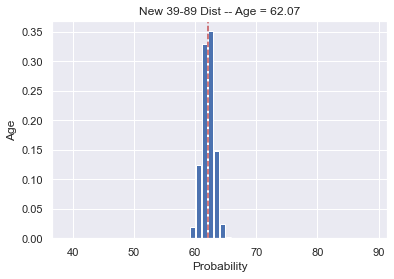

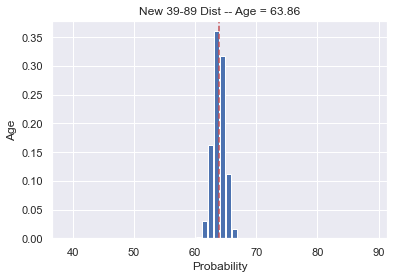

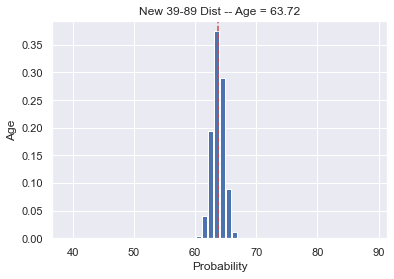

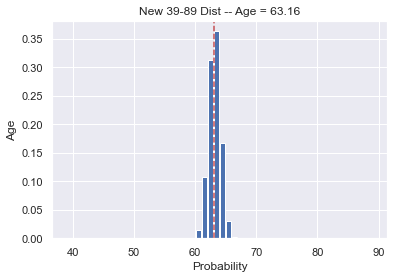

 ========= AGE RANGE: 65.0 - 70.0 ======== 


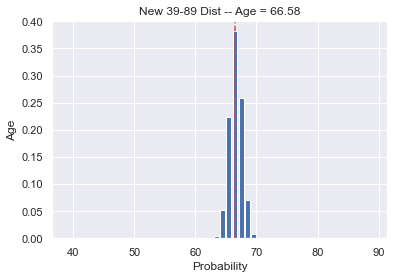

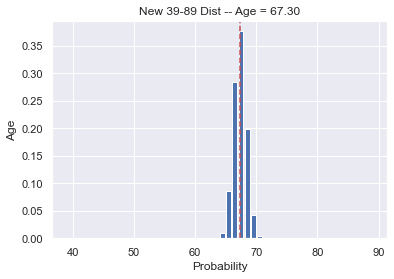

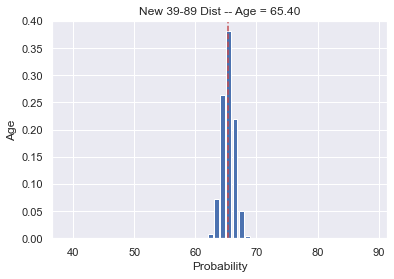

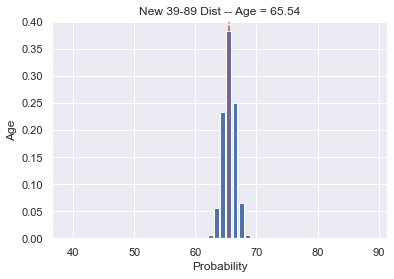

 ========= AGE RANGE: 70.0 - 75.0 ======== 


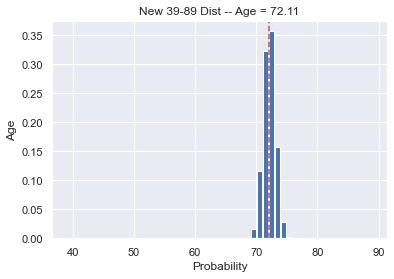

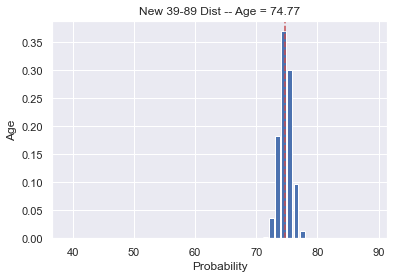

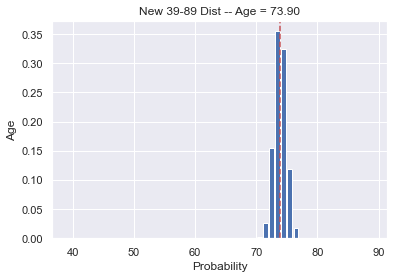

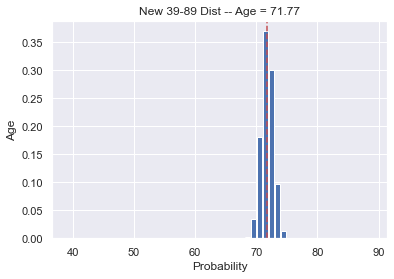

 ========= AGE RANGE: 75.0 - 80.0 ======== 


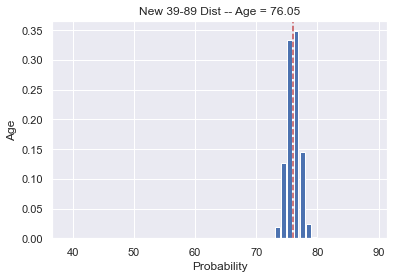

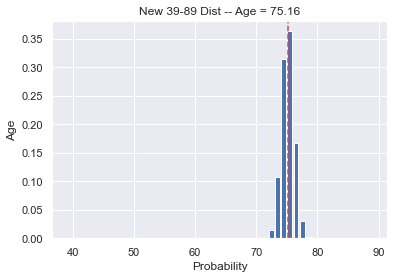

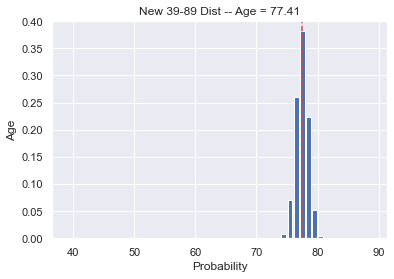

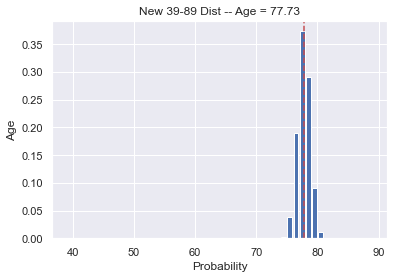

 ========= AGE RANGE: 80.0 - 85.0 ======== 


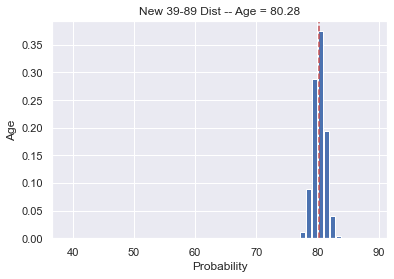

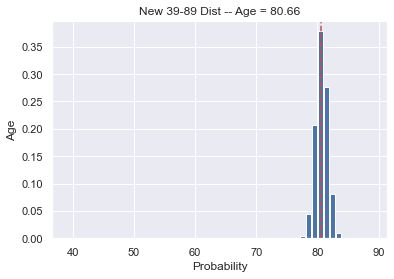

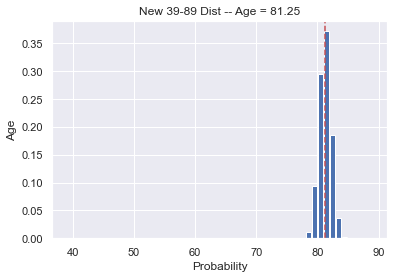

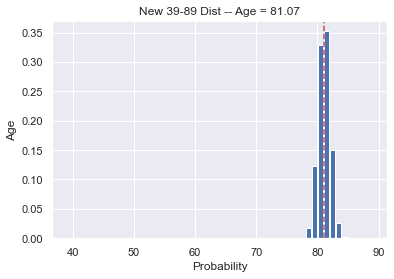

In [29]:
for idx, age in enumerate(age_bins[:-1]):
    age2 = ages2[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
    dist2 = distribution2[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
    
    print(" ========= AGE RANGE: {} - {} ======== ".format(age_bins[idx], age_bins[idx+1]))
    
    if len(age2) >= 4:
        random_subjects = np.random.choice(age2, size=4, replace=False)
    else:
        random_subjects = np.random.choice(age2, size=len(age1), replace=False)
    
    for subj in random_subjects:
        i = np.where(age2==subj)[0][0].astype(int)
        plt.bar(bins2, dist2[i])
        plt.axvline(x=age2[i], ymin=0, ymax=1, c='r', ls='--')
        plt.title('New 39-89 Dist -- Age = {:.2f}'.format(age2[i]))
        plt.ylabel('Age')
        plt.xlabel('Probability')
        plt.show()

## Average Distributions Across Bin Ranges (every 5 years?)

In [30]:
age_bins = np.linspace(45,85,9)
print(age_bins)

[45. 50. 55. 60. 65. 70. 75. 80. 85.]


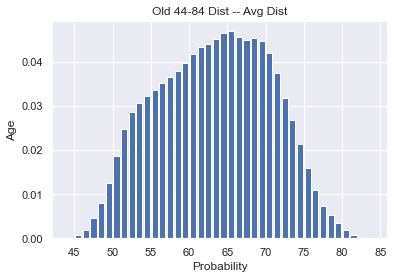

In [31]:
dist1 = distribution1.mean(axis=0)
plt.bar(bins1, dist1)
plt.title('Old 44-84 Dist -- Avg Dist')
plt.ylabel('Age')
plt.xlabel('Probability')
plt.show()

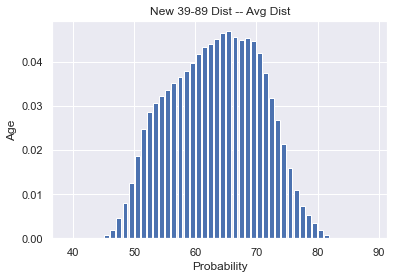

In [32]:
dist2 = distribution2.mean(axis=0)
plt.bar(bins2, dist2)
plt.title('New 39-89 Dist -- Avg Dist')
plt.ylabel('Age')
plt.xlabel('Probability')
plt.show()

<AxesSubplot:ylabel='Density'>

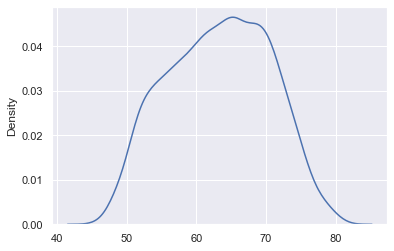

In [33]:
sns.kdeplot(ages1)

 ========= AGE RANGE: 45.0 - 50.0 ======== 


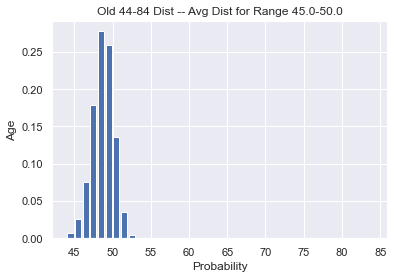

 ========= AGE RANGE: 50.0 - 55.0 ======== 


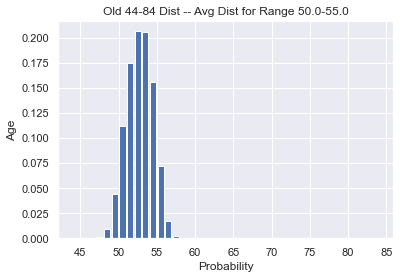

 ========= AGE RANGE: 55.0 - 60.0 ======== 


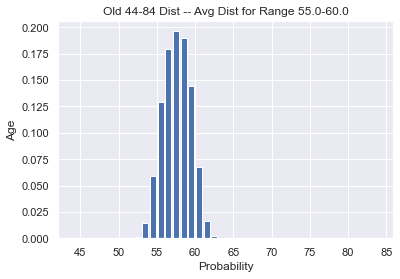

 ========= AGE RANGE: 60.0 - 65.0 ======== 


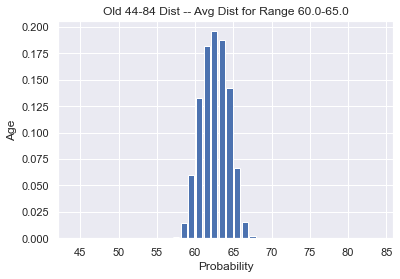

 ========= AGE RANGE: 65.0 - 70.0 ======== 


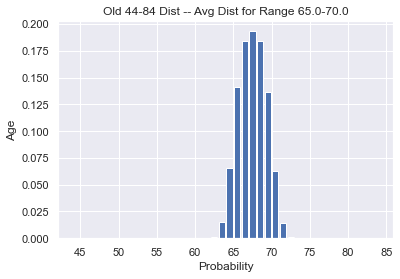

 ========= AGE RANGE: 70.0 - 75.0 ======== 


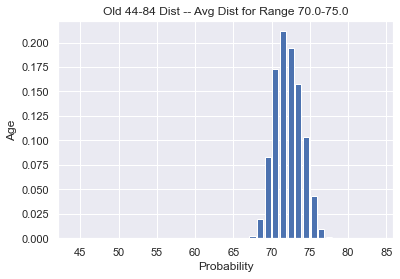

 ========= AGE RANGE: 75.0 - 80.0 ======== 


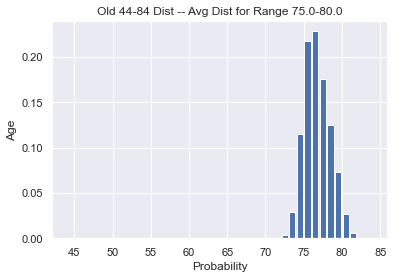

 ========= AGE RANGE: 80.0 - 85.0 ======== 


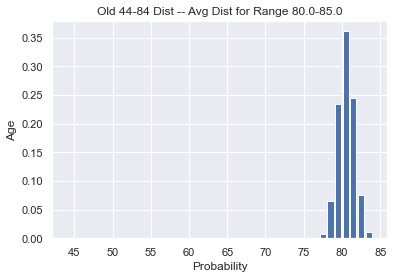

In [34]:
for idx, age in enumerate(age_bins[:-1]):
    dist1 = distribution1[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
    
    print(" ========= AGE RANGE: {} - {} ======== ".format(age_bins[idx], age_bins[idx+1]))
    
    dist1 = dist1.mean(axis=0)
    plt.bar(bins1, dist1)
    plt.title('Old 44-84 Dist -- Avg Dist for Range {}-{}'.format(age_bins[idx], age_bins[idx+1]))
    plt.ylabel('Age')
    plt.xlabel('Probability')
    plt.show()

 ========= AGE RANGE: 45.0 - 50.0 ======== 


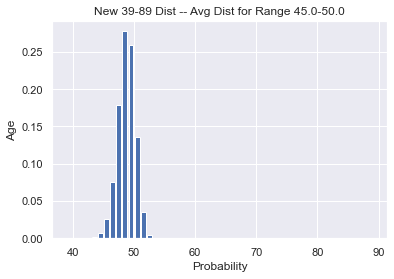

 ========= AGE RANGE: 50.0 - 55.0 ======== 


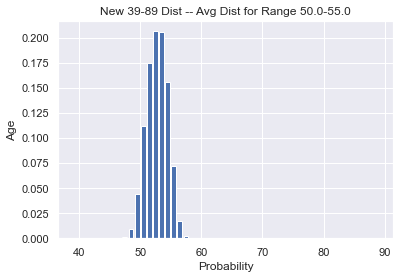

 ========= AGE RANGE: 55.0 - 60.0 ======== 


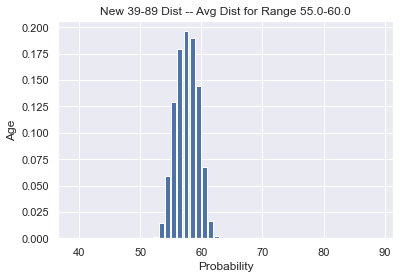

 ========= AGE RANGE: 60.0 - 65.0 ======== 


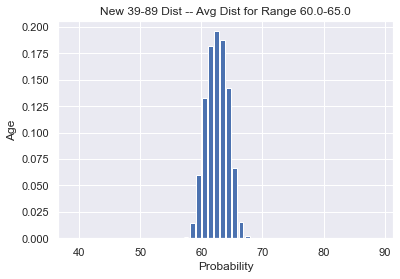

 ========= AGE RANGE: 65.0 - 70.0 ======== 


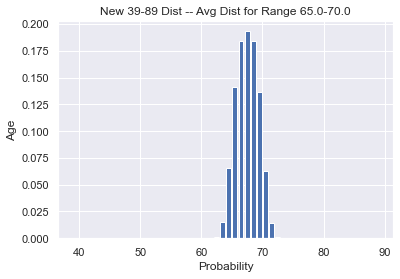

 ========= AGE RANGE: 70.0 - 75.0 ======== 


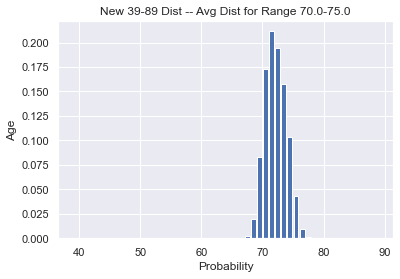

 ========= AGE RANGE: 75.0 - 80.0 ======== 


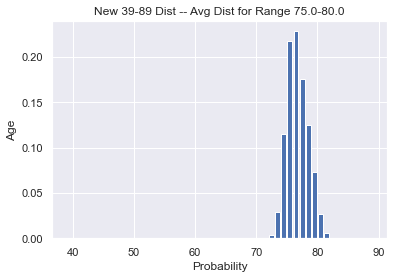

 ========= AGE RANGE: 80.0 - 85.0 ======== 


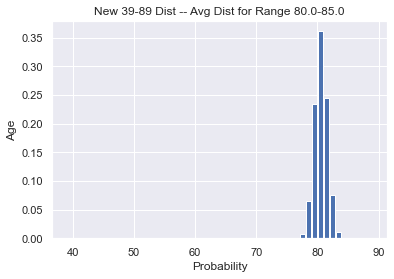

In [35]:
for idx, age in enumerate(age_bins[:-1]):
    dist2 = distribution2[(np.where((ages2 >= age) & (ages2 <= age_bins[idx+1] )))]
    
    print(" ========= AGE RANGE: {} - {} ======== ".format(age_bins[idx], age_bins[idx+1]))
    
    dist2 = dist2.mean(axis=0)
    plt.bar(bins2, dist2)
    plt.title('New 39-89 Dist -- Avg Dist for Range {}-{}'.format(age_bins[idx], age_bins[idx+1]))
    plt.ylabel('Age')
    plt.xlabel('Probability')
    plt.show()

## Distributions of subjects in the area of the peak (several subjects, maybe overlayed)

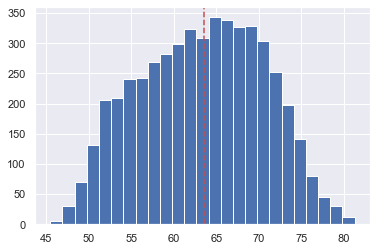

In [47]:
plt.hist(ages1, bins=25);
plt.axvline(x = ages1[2510], c='r', ls='--')

In [48]:
print(ages1.mean(), np.median(ages1))

63.24824507029465 63.58892694063934


In [49]:
ages1[2510]

63.583447488584625

In [50]:
elems = [2490, 2502, 2504, 2506, 2508, 2510, 2512, 2514, 2516, 2518]

In [51]:
len(elems)

10

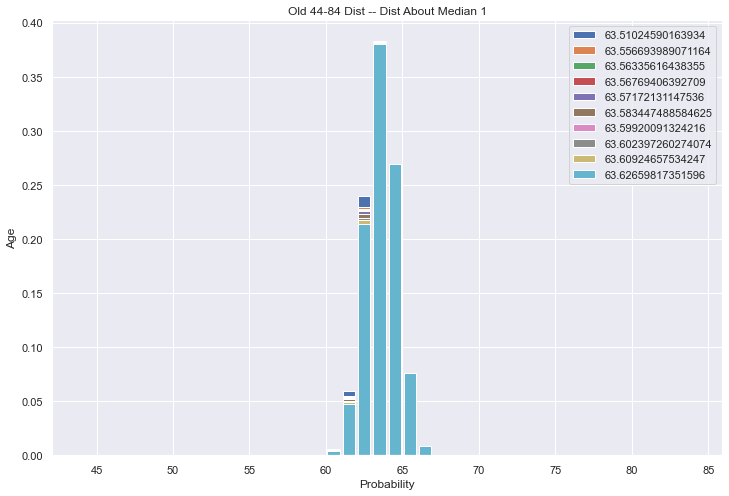

In [52]:
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(bins1, distribution1[elem], label=str(ages1[elem]))
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(ages1[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
plt.legend()
plt.show()

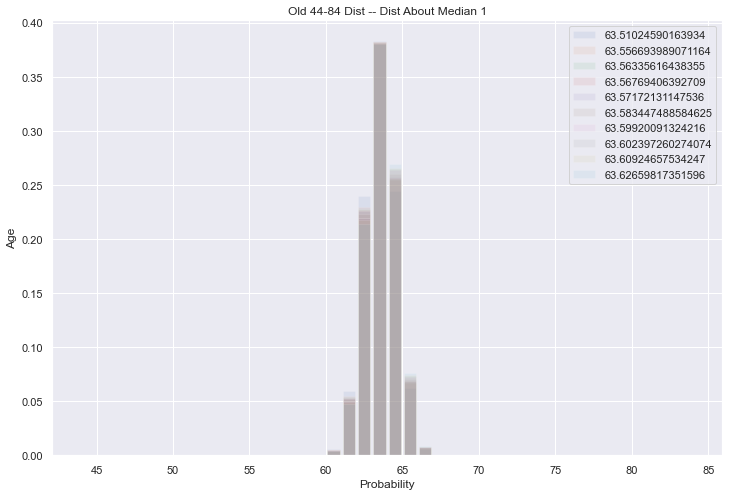

In [53]:
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(bins1, distribution1[elem], label=str(ages1[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(ages1[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
plt.legend()
plt.show()

[2500 2502 2504 2506 2508 2511 2513 2515 2517 2520]
[63.54713115 63.55669399 63.56335616 63.56769406 63.57172131 63.59440639
 63.59942922 63.60422374 63.60997268 63.62842466]


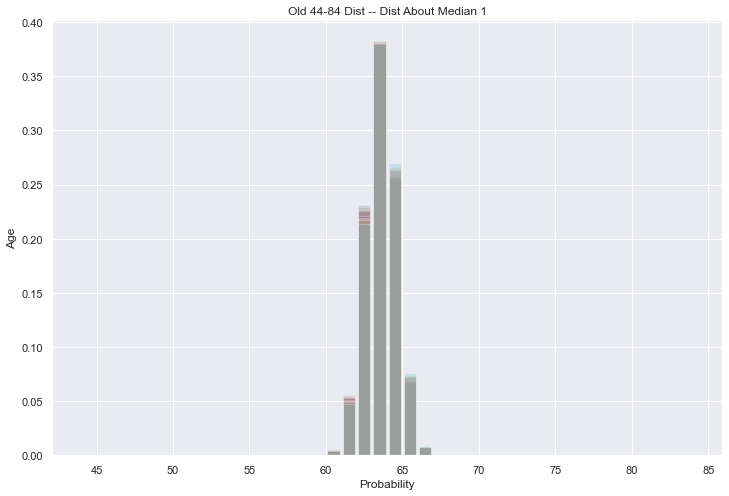

In [55]:
lims = 10
steps = 10
elems = np.linspace(2510-lims, 2510+lims, steps).astype(int)
print(elems)
print(ages1[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(bins1, distribution1[elem], label=str(ages1[elem]), alpha=0.25)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(ages1[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()

[2490 2492 2494 2496 2498 2500 2502 2504 2506 2508 2511 2513 2515 2517
 2519 2521 2523 2525 2527 2530]
[63.5102459  63.51997717 63.52134703 63.53116438 63.53321918 63.54713115
 63.55669399 63.56335616 63.56769406 63.57172131 63.59440639 63.59942922
 63.60422374 63.60997268 63.62751142 63.63321918 63.64006849 63.64646119
 63.64760274 63.66061644]


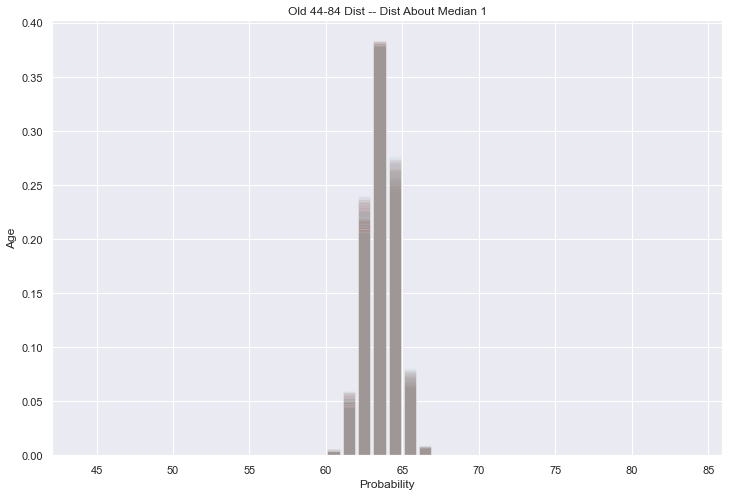

In [56]:
lims = 20
steps = 20
elems = np.linspace(2510-lims, 2510+lims, steps).astype(int)


print(elems)
print(ages1[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(bins1, distribution1[elem], label=str(ages1[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(ages1[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()

[2480 2483 2486 2489 2492 2495 2498 2502 2505 2508 2511 2514 2517 2521
 2524 2527 2530 2533 2536 2540]
[63.43436073 63.44577626 63.46267123 63.49052511 63.51997717 63.52910959
 63.53321918 63.55669399 63.56449772 63.57172131 63.59440639 63.60239726
 63.60997268 63.63321918 63.64275956 63.64760274 63.66061644 63.675
 63.68047945 63.70993151]


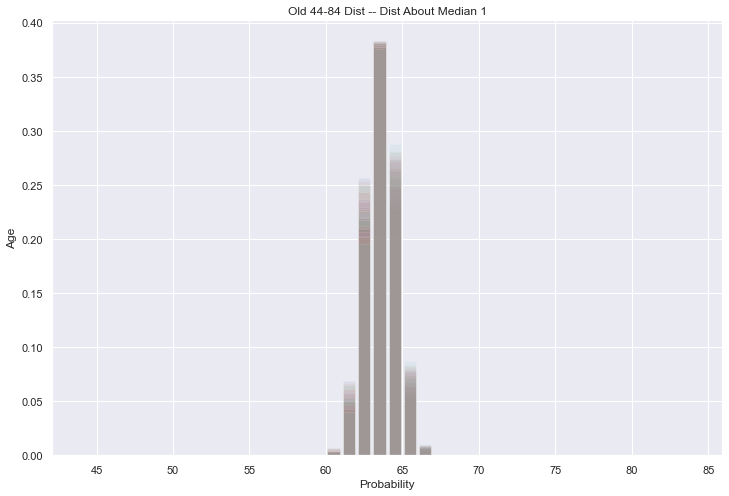

In [57]:
lims = 30
steps = 20
elems = np.linspace(2510-lims, 2510+lims, steps).astype(int)

print(elems)
print(ages1[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(bins1, distribution1[elem], label=str(ages1[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(ages1[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()

[2470 2474 2478 2482 2486 2491 2495 2499 2503 2507 2512 2516 2520 2524
 2528 2533 2537 2541 2545 2550]
[63.39440639 63.4119863  63.41883562 63.44509132 63.46267123 63.51267123
 63.52910959 63.5423516  63.5619863  63.57035519 63.59920091 63.60924658
 63.62842466 63.64275956 63.65924658 63.675      63.68755708 63.71084475
 63.72340183 63.75011416]


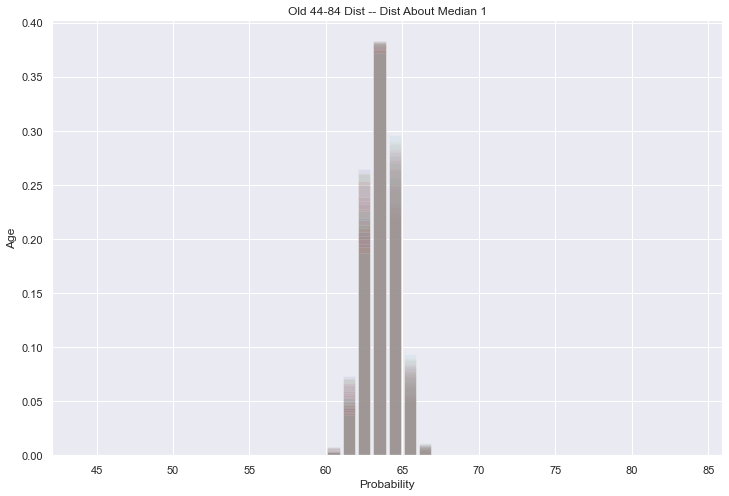

In [58]:
lims = 40
steps = 20
elems = np.linspace(2510-lims, 2510+lims, steps).astype(int)

print(elems)
print(ages1[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(bins1, distribution1[elem], label=str(ages1[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(ages1[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()

[2410 2420 2431 2441 2452 2462 2473 2483 2494 2504 2515 2525 2536 2546
 2557 2567 2578 2588 2599 2610]
[63.13184932 63.1523224  63.20513699 63.25399543 63.30194064 63.34280822
 63.41152968 63.44577626 63.52134703 63.56335616 63.60422374 63.64646119
 63.68047945 63.74166667 63.76997717 63.8140411  63.86543716 63.91325137
 63.97043379 64.03346995]


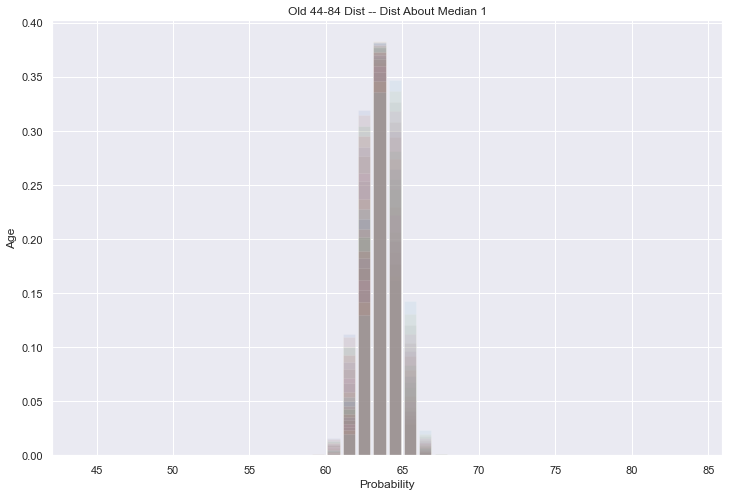

In [59]:
lims = 100
steps = 20
elems = np.linspace(2510-lims, 2510+lims, steps).astype(int)

print(elems)
print(ages1[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(bins1, distribution1[elem], label=str(ages1[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(ages1[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()

[2310 2331 2352 2373 2394 2415 2436 2457 2478 2499 2520 2541 2562 2583
 2604 2625 2646 2667 2688 2710]
[62.63892694 62.7466895  62.85314208 62.99509132 63.0793379  63.14275956
 63.23390411 63.32682648 63.41883562 63.5423516  63.62842466 63.71084475
 63.79714612 63.87591324 64.00034247 64.10194064 64.19440639 64.25856164
 64.35216895 64.41495434]


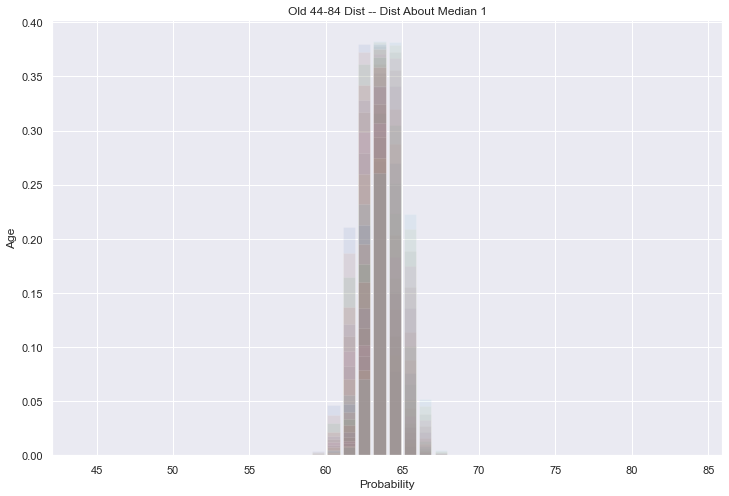

In [60]:
lims = 200
steps = 20
elems = np.linspace(2510-lims, 2510+lims, steps).astype(int)

print(elems)
print(ages1[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(bins1, distribution1[elem], label=str(ages1[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(ages1[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()